#### Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Потроить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Машинное обучение\Лекции. Презентации\Оценка точности модели\adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
# заметно, что в таблице некоторые данные представлены заком вопроса "?"
# переоткроем таблицу с (na_values='?'), преобразуя "?" в None или заменим их через replace
data = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Машинное обучение\Лекции. Презентации\Оценка точности модели\adult.csv', na_values='?')
data.head()
# или data.replace(['?'], [None], inplace=True)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#data.isnull().sum()
for col in data.columns:
    miss = data[col].isnull().mean()
    print(f'{col} - {miss:.1%}')

age - 0.0%
workclass - 5.7%
fnlwgt - 0.0%
education - 0.0%
educational-num - 0.0%
marital-status - 0.0%
occupation - 5.8%
relationship - 0.0%
race - 0.0%
gender - 0.0%
capital-gain - 0.0%
capital-loss - 0.0%
hours-per-week - 0.0%
native-country - 1.8%
income - 0.0%


In [8]:
# пропуски незначительны, и в данном задании не акцентированы, поэтому, для простоты решения удалим строки с None
data = data[pd.isnull(data['workclass'])==0]  # удаляем строки отдельно по столбцам с пропусками
# или сразу все
data.dropna(inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Готовим данные

Формируем набор признаков и целевую переменную (X, y)

In [10]:
# X = data.loc[:, data.columns != 'income']

# feature_columns = [c for c in data.columns if c != 'income']
# X = data[feature_columns]

X = data[data.columns[:-1]]
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [11]:
# целевая переменная
y = data['income']
y

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45222, dtype: object

In [12]:
# целевая переменная income является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# y = pd.Series(data = le.fit_transform(y))
le.fit(y)
y = pd.Series(data = le.transform(y))
y

0        0
1        0
2        1
3        1
4        0
        ..
45217    0
45218    1
45219    0
45220    0
45221    1
Length: 45222, dtype: int32

#### Разделим наши данные X на обучаемую и тестовую части  
(почему идет ошибка, если делать разделение данных после ColumnTransformer?)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Строим модель

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# некоторые признаки X являются категориальными переменными
# переведем категориальные столбцы в значения 0 и 1, добавив столбцы с соответствующими значениями
# потом стандартизируем численные признаки

# X = pd.get_dummies(X, columns = ['workclass', 'education', 'marital-status',  'occupation', 'relationship', 'race', 'gender', 'native-country'])
# X = pd.get_dummies(X)
# X = pd.get_dummies(X, dummy_na=True)    #если в данных есть Nan, выводит отдельную колонку под NaN

#sc = StandardScaler()
#X = pd.DataFrame(sc.fit_transform(X))


# или разделим признаки на категориальные и числовые: 
# категориальные пропустим через OneHotEncoder,  числовые - через StandardScaler

# разделим признаки
# numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# categor_columns = ['workclass', 'education', 'marital-status',  'occupation', 'relationship', 'race', 'gender', 'native-country']
numeric_columns = list(X.columns[X.dtypes == 'int64'])
categor_columns = list(X.columns[X.dtypes == 'object'])

# можно вывести список уникальных значений для всех колонок categories для OneHotEncoder(categories=categories)
# или OneHotEncoder автоматически определит categories при fit_transform
# 'образец X = OneHotEncoder().fit_transform(X[numeric_columns]).toarray()'
# cоздадим конвейеры предварительной обработки как для числовых, так и для категориальных данных

categories = []
for col in list(X.columns[X.dtypes == 'object']):
    categories.append(list(X[col].unique()))

preprocessor = ColumnTransformer(
    transformers=[
        ('categor', OneHotEncoder(categories=categories), categor_columns),
        ('numeric', StandardScaler(), numeric_columns)
    ],
    sparse_threshold=0,   # вернем массив, а не разреженную матрицу, плотный результат
    remainder='drop'      # по умолчанию remainder='drop', удаляются "остатки" непреобразованных столбцов
)

X = pd.DataFrame(list(preprocessor.fit_transform(X)))
X

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.873671,0.639611,0.737034,-0.146733,-0.21878,-0.244684
45218,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.109857,-0.334735,-0.438122,-0.146733,-0.21878,-0.078120
45219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.471665,-0.358060,-0.438122,-0.146733,-0.21878,-0.078120
45220,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.251951,0.111279,-0.438122,-0.146733,-0.21878,-1.743763


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Columns: 104 entries, 0 to 103
dtypes: float64(104)
memory usage: 35.9 MB


#### Готовим модель и обучаем

In [16]:
# Добавим классификатор в конвейер предварительной обработки
# Теперь у нас есть полный конвейер прогнозирования

#clf = Pipeline(steps=[('preprocessor', preprocessor),
                      #('classifier', LogisticRegression())])
# добавим регуляризацию 'l1', 'l2'

proba = {}
score = {}

for c in np.logspace(0.01, 1.5, 10):
    clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l1', C=c, solver='liblinear'))])
    clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty='l2', C=c, solver='liblinear'))])
    
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    
    probas1 = clf1.predict_proba(X_test)[:,1]
    probas2 = clf2.predict_proba(X_test)[:,1]
    proba[('l1', c)] = probas1
    proba[('l2', c)] = probas2
    
    score1Train = clf1.score(X_train, y_train)
    score1Test = clf1.score(X_test, y_test)
    
    score2Train = clf2.score(X_train, y_train)
    score2Test = clf2.score(X_test, y_test)
    
    score['l1'] = [score1Train, score1Test]
    score['l2'] = [score2Train, score2Test]

In [17]:
proba

{('l1',
  1.023292992280754): array([0.0612033 , 0.02540646, 0.16020161, ..., 0.00264183, 0.00868394,
        0.44207733]),
 ('l2',
  1.023292992280754): array([0.06069884, 0.02543358, 0.16036535, ..., 0.0026283 , 0.00734416,
        0.43858319]),
 ('l1',
  1.4981508863375024): array([0.06103915, 0.0253163 , 0.15964748, ..., 0.00260526, 0.00794782,
        0.44177455]),
 ('l2',
  1.4981508863375024): array([0.06068424, 0.02533878, 0.159779  , ..., 0.00258818, 0.00696292,
        0.43909106]),
 ('l1',
  2.193366020450619): array([0.06090538, 0.02528181, 0.15921689, ..., 0.00256204, 0.00729215,
        0.44149135]),
 ('l2',
  2.193366020450619): array([0.0606296 , 0.02528377, 0.15927414, ..., 0.00255805, 0.00672077,
        0.43953662]),
 ('l1',
  3.211194909364823): array([0.06080376, 0.02525652, 0.15891373, ..., 0.00254051, 0.0069376 ,
        0.44126503]),
 ('l2',
  3.211194909364823): array([0.06069249, 0.02527507, 0.15911567, ..., 0.00253573, 0.00652683,
        0.43995578]),
 ('l1'

In [18]:
# оценка качества 
score

{'l1': [0.852029695150845, 0.8421906095673325],
 'l2': [0.8519981045648397, 0.8421169013046362]}

#### Оценим качество

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, log_loss

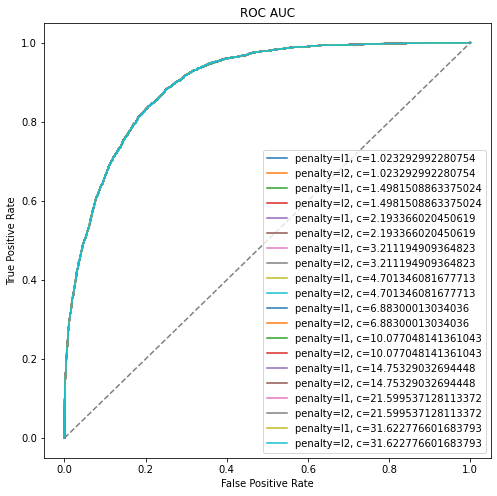

In [20]:
fpr_tpr_thres = []
plt.figure(figsize=(8,8))

for (penalty, c), prob in proba.items():
    fpr, tpr, thres = roc_curve(y_test, prob)
    fpr_tpr_thres.append([fpr, tpr, thres])
     
    plt.plot(fpr, tpr, label=f'penalty={penalty}, c={c}')
    
plt.plot([0,1], [0,1], '--', color=(0.5, 0.5, 0.5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.show()

# видно, что в нашем случае, зависимых признаков нет, в регуляризации нет необходимости

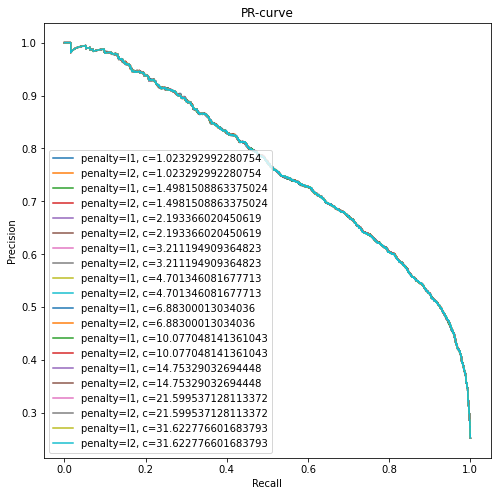

In [21]:
precision_recall_thresholds = []
plt.figure(figsize=(8,8))

for (penalty, c), prob in proba.items():
    precision, recall, thresholds = precision_recall_curve(y_test, prob)
    precision_recall_thresholds.append([precision, recall, thresholds])       
    
    plt.plot(recall, precision, label=f'penalty={penalty}, c={c}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.legend(loc='lower left')
plt.show()

In [22]:
for (penalty, c), prob in proba.items():
    print('penalty=', penalty, 'c=', c, 'roc_auc_score:', roc_auc_score(y_test, prob))
    print('penalty=', penalty, 'c=', c, 'average_precision_score:', average_precision_score(y_test, prob))
    print('penalty=', penalty, 'c=', c, 'log_loss:', log_loss(y_test, prob))
    print()

penalty= l1 c= 1.023292992280754 roc_auc_score: 0.8996218946435074
penalty= l1 c= 1.023292992280754 average_precision_score: 0.7629185056269117
penalty= l1 c= 1.023292992280754 log_loss: 0.3365753340550462

penalty= l2 c= 1.023292992280754 roc_auc_score: 0.8997527086179175
penalty= l2 c= 1.023292992280754 average_precision_score: 0.7630269697602692
penalty= l2 c= 1.023292992280754 log_loss: 0.3363997502117721

penalty= l1 c= 1.4981508863375024 roc_auc_score: 0.8996111566125975
penalty= l1 c= 1.4981508863375024 average_precision_score: 0.7628850668373113
penalty= l1 c= 1.4981508863375024 log_loss: 0.33662405565987064

penalty= l2 c= 1.4981508863375024 roc_auc_score: 0.8997253597456267
penalty= l2 c= 1.4981508863375024 average_precision_score: 0.7630049673901178
penalty= l2 c= 1.4981508863375024 log_loss: 0.3364579227188527

penalty= l1 c= 2.193366020450619 roc_auc_score: 0.8996132293692343
penalty= l1 c= 2.193366020450619 average_precision_score: 0.7628915576277705
penalty= l1 c= 2.1933

#### Написание метрик с нуля

In [23]:
 # посчитаем метрики вручную (tp, fp, tn, fn)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])    
clf.fit(X_train, y_train)
    
probas = clf.predict_proba(X_test)[:,1]

tpr_ = []
fpr_ = []

tp = 0
fp = 0
tn = 0
fn = 0

for i in np.linspace(0.1, 0.91, 10):
    for predi, actual in zip(probas, y_test):    
        if predi >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    print(tp, fp, tn, fn)  
    
    # accuracy то же, что и model.score
    # доля правиль предсказанных от всех вариантов
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    print('accuracy=', accuracy)
    
    # точность
    # способность отличать данный класс от других классов
    try:
        precision = tp/(tp + fp)
        print('precision=', precision)
    except:
        precision = 0
        print('precision не опделяется')
    
    # полнота
    # способность обнаруживать данный класс
    recall = tp/(tp + fn)
    print('recall=', recall)
    
    # f1 
    try:
        f1 = 2 * ((precision * recall)/(precision  + recall))
        print('f1', f1)
    except:
        f1 = 0
        print('f1 не опделяется')
        
    # tpr
    # доля правильно предсказанных среди категории 1
    tpr = (tp)/(tp + fn)
    print('tpr', tpr)
    tpr_.append(tpr)
    
    # fpr
    # доля неправильно предсказанных среди категории 0
    fpr = (fp)/(fp + tn)
    print('fpr', fpr)
    fpr_.append(fpr)
    
    print('------')

3261 3792 6350 164
accuracy= 0.708410112773642
precision= 0.46235644406635473
recall= 0.9521167883211679
f1 0.6224470318763122
tpr 0.9521167883211679
fpr 0.3738907513310984
------
6298 6411 13873 552
accuracy= 0.7433846834230117
precision= 0.49555433157604845
recall= 0.9194160583941606
f1 0.644000204509433
tpr 0.9194160583941606
fpr 0.3160619207256951
------
9059 8232 22194 1216
accuracy= 0.7678681113486155
precision= 0.5239141750043376
recall= 0.881654501216545
f1 0.6572589421751432
tpr 0.881654501216545
fpr 0.2705580753303096
------
11518 9503 31065 2182
accuracy= 0.7846797375985848
precision= 0.5479282622139765
recall= 0.8407299270072993
f1 0.6634601537974136
tpr 0.8407299270072993
fpr 0.23424866890159732
------
13688 10401 40309 3437
accuracy= 0.7960050121618634
precision= 0.5682261613184441
recall= 0.7992992700729927
f1 0.6642403066919007
tpr 0.7992992700729927
fpr 0.20510747387103134
------
15535 11031 49821 5015
accuracy= 0.8028795361293334
precision= 0.5847700067755778
recall= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


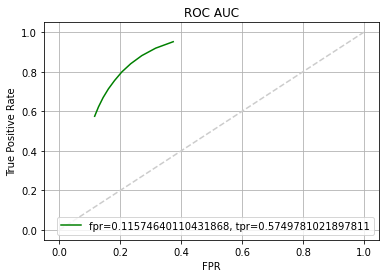

In [24]:
plt.plot(fpr_, tpr_, label=f'fpr={fpr}, tpr={tpr}', c = 'green')
    
plt.plot([0,1], [0,1], '--', color=(0.8, 0.8, 0.8))
plt.xlabel('FPR')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.grid()
plt.show()